# Timing scalar_real functions

This code uses the magic function `%timeit`<sup> 1 2 </sup> to measure the excetution time of functions `scalar_real_dumb` , `scalar_real_numpy`, `scalar_real_numba` and `dot_real_parallel`.

* <sup> 1 </sup>[Profiling and Timing Code - excerpt from the Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html)

* <sup> 2 </sup>[Python documentation - timeit — Measure execution time of small code snippets](https://docs.python.org/3/library/timeit.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import blas
from matcomp import functions_intro as fcs
from tqdm.notebook import tqdm as tq # produce the progress bar

In [2]:
# number of elements forming the vectors
N = np.array([100, 300, 500, 700, 1000, 1500, 2000, 5000, 10000])

In [4]:
list_time_dumb = []
list_time_numpy = []
list_time_numba = []
list_time_blas = []
for Ni in tq(N):
    vector = np.ones(Ni)
    # scalar_vec_real_dumb
    time = %timeit -o fcs.scalar_vec_real_dumb(2.0, vector)
    list_time_dumb.append(time.average)
    # scalar_vec_real_numpy
    time = %timeit -o fcs.scalar_vec_real_numpy(2.0, vector)
    list_time_numpy.append(time.average)
    # scalar_vec_real_numba
    time = %timeit -o fcs.scalar_vec_real_numba(2.0, vector)
    list_time_numba.append(time.average)
    # blas.dscal
    time = %timeit -o blas.dscal(2.0, vector)
    list_time_blas.append(time.average)

318 µs ± 6.62 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.04 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
The slowest run took 11.41 times longer than the fastest. This could mean that an intermediate result is being cached.
4.92 µs ± 6.6 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
278 ns ± 9.07 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
918 µs ± 15.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.29 µs ± 22.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.46 µs ± 5.29 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
293 ns ± 1.13 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.5 ms ± 3.84 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.42 µs ± 21.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.49 µs ± 4.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
331 ns ± 6.66 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops eac

In [5]:
list_time_dumb = np.array(list_time_dumb)
list_time_numpy = np.array(list_time_numpy)
list_time_numba = np.array(list_time_numba)
list_time_blas = np.array(list_time_blas)

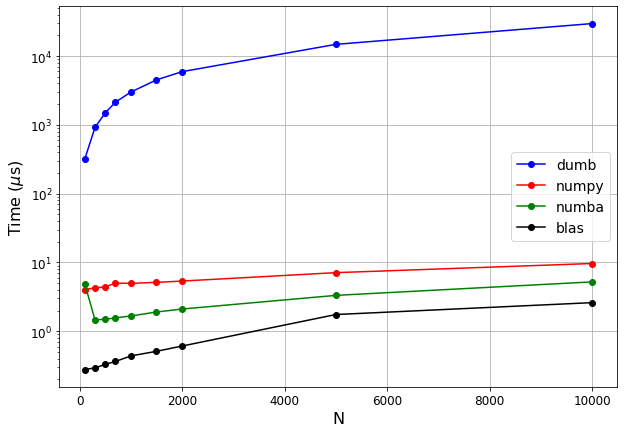

In [6]:
plt.figure(figsize=(10,7))
plt.plot(N, list_time_dumb*1e6, 'bo-', label = 'dumb')
plt.plot(N, list_time_numpy*1e6, 'ro-', label = 'numpy')
plt.plot(N, list_time_numba*1e6, 'go-', label = 'numba')
plt.plot(N, list_time_blas*1e6, 'ko-', label = 'blas')
plt.legend(loc = 'best', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('N', fontsize = 16)
plt.ylabel('Time ($\mu$s)', fontsize = 16)
plt.yscale('log')
plt.grid()
plt.show()